# Import Library dan dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns

In [2]:
df = pd.read_csv("Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


# Data Cleansing

## 1. Cek Missing Value

In [4]:
df.isnull().any()

ID                     False
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
Reached.on.Time_Y.N    False
dtype: bool

#### Tidak ada missing value yang terdeteksi pada data kita

## 2. Buang fitur yang tidak akan terpakai (fitur "ID")

In [5]:
df = df.drop(["ID"],axis=1)

In [6]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## 3. Encoding data untuk diproses oleh machine learning

#### Untuk keperluan pembuatan model machine learning dan lain hal, dibuat dataframe baru di mana data-data kategorikal sudah dilakukan encoding. Kita memiliki dua dataframe sekarang.

#### Encoding With Label Encoder

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [8]:
comm= df.copy()
for col in comm.select_dtypes(include='O').columns:
    comm[col]=le.fit_transform(comm[col])

In [9]:
comm.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1


In [10]:
comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      10999 non-null  int64
 1   Mode_of_Shipment     10999 non-null  int64
 2   Customer_care_calls  10999 non-null  int64
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Product_importance   10999 non-null  int64
 7   Gender               10999 non-null  int64
 8   Discount_offered     10999 non-null  int64
 9   Weight_in_gms        10999 non-null  int64
 10  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(11)
memory usage: 945.4 KB


# Exploratory Data Analysis

## 1. Descriptive Statistik

In [11]:
def summary(df,column):
    print("Distinct : ",len(pd.unique(df[column])))
    print("Missing : ",df[column].isnull().sum())
    print("Sum : ",df[column].sum())
    print("Mode : ",st.mode(df[column]))
    print("stddev : ",np.std(df[column]))
    print("CV :",100*(np.std(df[column]))/(np.mean(df[column]))) #coefficient of variation
    print("Min : ",df[column].min())
    print("Max : ",df[column].max())
    print("Mean : ",df[column].mean())
    print("Q1 : ",np.quantile(df[column],0.25))
    print("Q1 : ",np.quantile(df[column],0.5))
    print("Q1 : ",np.quantile(df[column],0.75))
    
    
def values(df,column):
    for i in df[column].unique():
        print(i)


def values_df(df):
    for i in df.columns:
        print(i)
        for j in df[i].unique():
            print(j)
        print("-"*20)
        
def proportion(df,column):
    for i in df[column].unique():
        counts = (sum(df[column]==i)/df[column].count()) *100
        print (i,' dengan proporsi {}%'.format(counts))

#### Kita lihat deskripsi statistik singkat dari data

In [12]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


#### Atau bisa dilihat dari data yang sudah diencoded:

In [13]:
comm.describe()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,2.333394,1.516865,4.054459,2.990545,210.196836,3.567597,1.346031,0.495863,13.373216,3634.016729,0.596691
std,1.490726,0.756894,1.141490,1.413603,48.063272,1.522860,0.631434,0.500006,16.205527,1635.377251,0.490584
min,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,1.000000,0.000000,4.000000,1839.500000,0.000000
50%,3.000000,2.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000
75%,4.000000,2.000000,5.000000,4.000000,251.000000,4.000000,2.000000,1.000000,10.000000,5050.000000,1.000000
max,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,1.000000,65.000000,7846.000000,1.000000


In [14]:
for i in comm.columns:
    print (i,'\n')
    summary(comm,i)
    print("-"*30)

Warehouse_block 

Distinct :  5
Missing :  0
Sum :  25665
Mode :  4
stddev :  1.490657770144777
CV : 63.88367353914827
Min :  0
Max :  4
Mean :  2.333393944904082
Q1 :  1.0
Q1 :  3.0
Q1 :  4.0
------------------------------
Mode_of_Shipment 

Distinct :  3
Missing :  0
Sum :  16684
Mode :  2
stddev :  0.7568592007222695
CV : 49.89627396753921
Min :  0
Max :  2
Mean :  1.5168651695608693
Q1 :  1.0
Q1 :  2.0
Q1 :  2.0
------------------------------
Customer_care_calls 

Distinct :  6
Missing :  0
Sum :  44595
Mode :  4
stddev :  1.141437755315412
CV : 28.15264911024603
Min :  2
Max :  7
Mean :  4.054459496317847
Q1 :  3.0
Q1 :  4.0
Q1 :  5.0
------------------------------
Customer_rating 

Distinct :  5
Missing :  0
Sum :  32893
Mode :  3
stddev :  1.4135389093311672
CV : 47.266939664164134
Min :  1
Max :  5
Mean :  2.9905445949631786
Q1 :  2.0
Q1 :  3.0
Q1 :  4.0
------------------------------
Cost_of_the_Product 

Distinct :  215
Missing :  0
Sum :  2311955
Mode :  245
stddev :  48.061

## 2. Cek Imbalanced Dataset (Cek Proporsi kelas target)

#### Kita lihat distribusi target value kita

In [15]:
proportion(comm,'Reached.on.Time_Y.N')

1  dengan proporsi 59.66906082371125%
0  dengan proporsi 40.33093917628875%


Terlihat proporsi atau banyak data tiap kelas target yang kita miliki tidak terlalu jauh perbedaan jumlahnya, jadi cukup terhindar dari permasalahan imbalanced dataset

## 3. Cek Outlier

In [16]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


#### Dari deskripsi statistik data, fitur "Weight_in_gms" terlihat sedikit mencurigakan, kita akan cek apakah pada fitur-fitur tersebut terdapat outlier

#### Kita cek outlier dengan menggunakan Interquartile Range (IQR)

In [17]:
Q12 = df['Weight_in_gms'].quantile(0.25)
Q32 = df['Weight_in_gms'].quantile(0.75)
IQR = Q32-Q12

In [18]:
df[df['Weight_in_gms']>(Q32+(1.5*IQR))]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


#### Terlihat tidak terdeteksi adanya outlier pada fitur data Weight_in_gms

# Data Visualization

## 1. Korelasi Antar Fitur Pada Data

Kita lihat correlation heatmap pada data awal

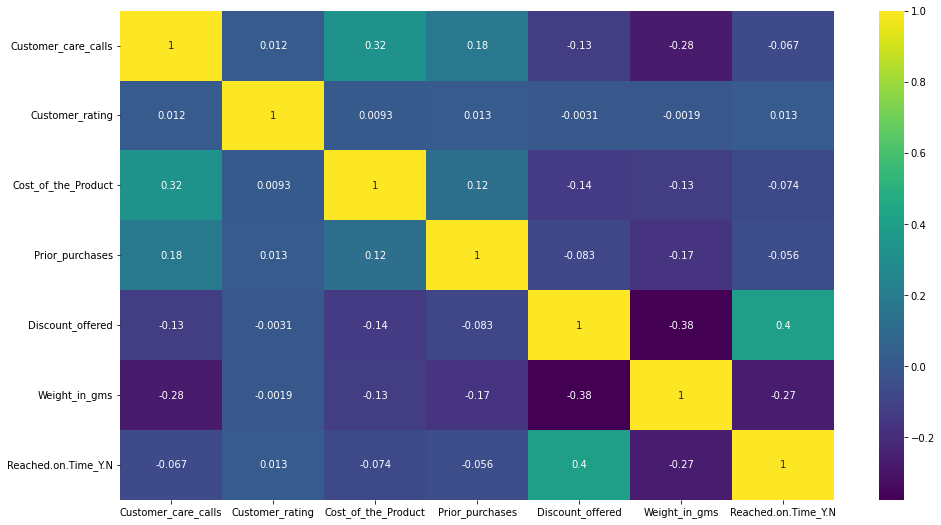

In [19]:
plt.figure(figsize=(16,9))
x = df.drop(['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'],axis = 1)
ax = sns.heatmap(df.corr(),annot = True,cmap = 'viridis')
plt.show()

#### Sekarang kita coba juga pada data yang sudah diencoding

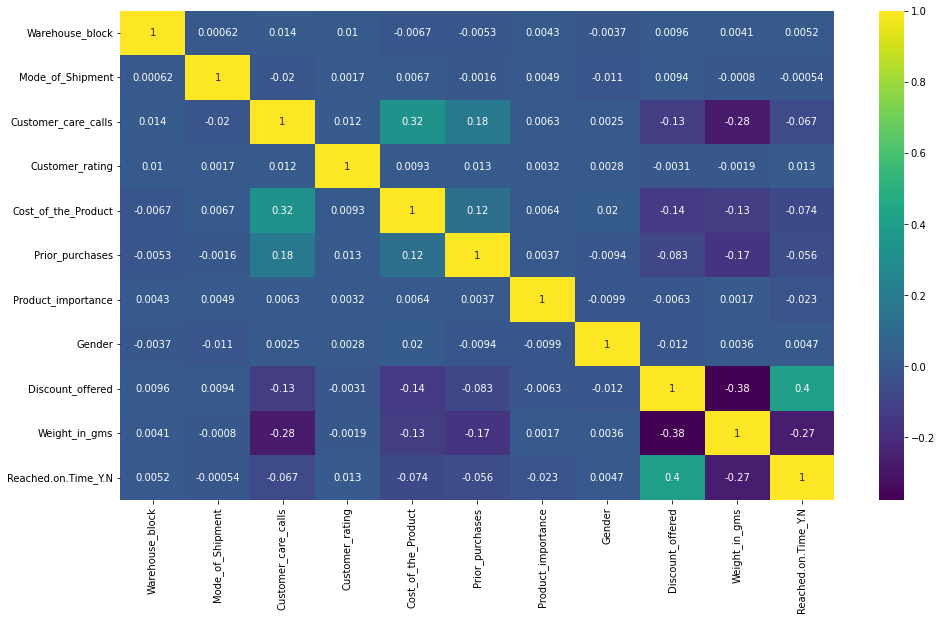

In [20]:
plt.figure(figsize=(16,9))
x = comm
ax = sns.heatmap(comm.corr(),annot = True,cmap = 'viridis')
plt.show()

#### Terlihat bahwa masing-masing fitur pada data tidak ada yang memiliki korelasi signifikan pada kolom target kita, yaitu "Reached.on.Time_YN"

#### Fitur discount_offered memiliki korelasi paling besar, yaitu 0.4 pada fitur "Reached.on.Time_YN", namun nilai ini tidak menunjukan korelasi yang cukup kuat antara kedua fitur tersebut.

## 2. Basic Visualization

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


### 2.1. Fitur Warehouse_block

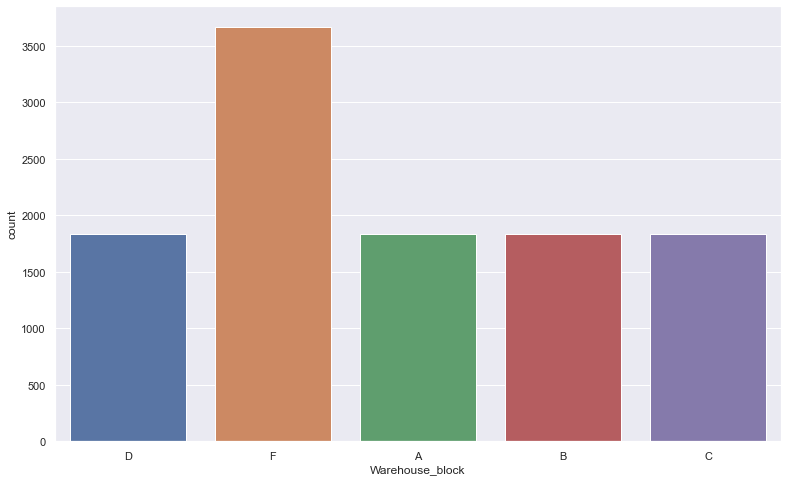

In [22]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='Warehouse_block',data=df)

<Figure size 1440x576 with 0 Axes>

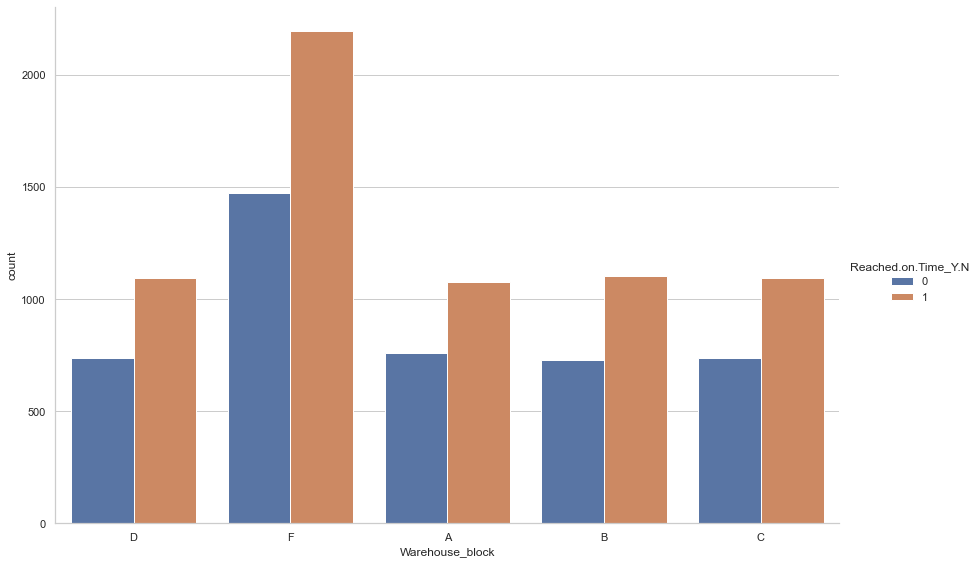

In [23]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Warehouse_block',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### 2.2. Fitur Mode_of_Shipment

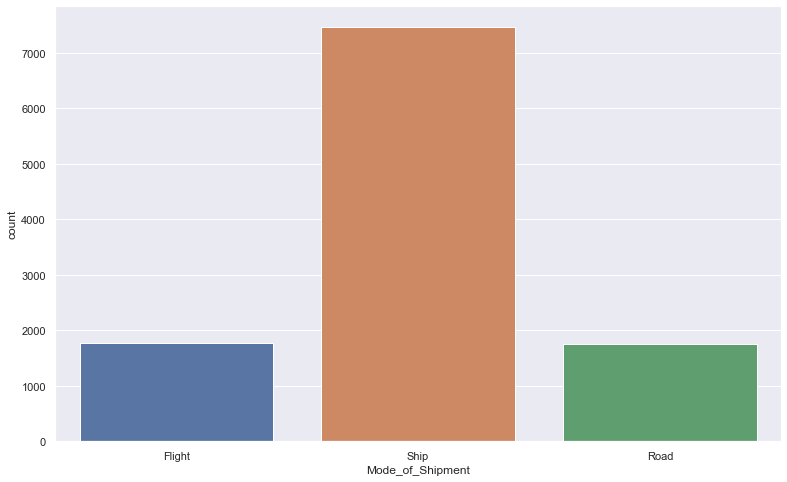

In [24]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='Mode_of_Shipment',data=df)

<Figure size 1440x576 with 0 Axes>

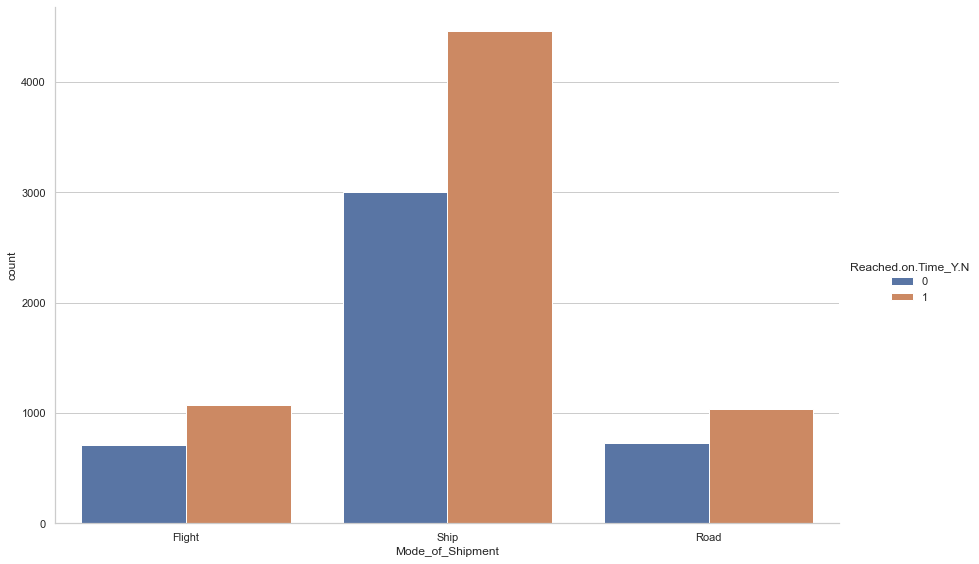

In [25]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Mode_of_Shipment',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### 2.3. Fitur Customer_care_calls

<Figure size 1440x576 with 0 Axes>

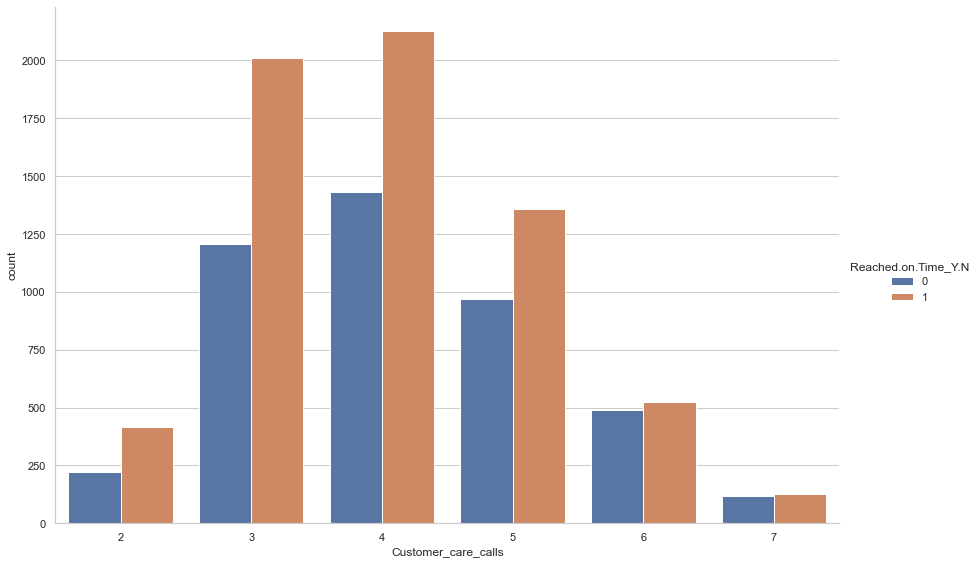

In [26]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Customer_care_calls',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### 2.4. Fitur Customer_rating

<Figure size 1440x576 with 0 Axes>

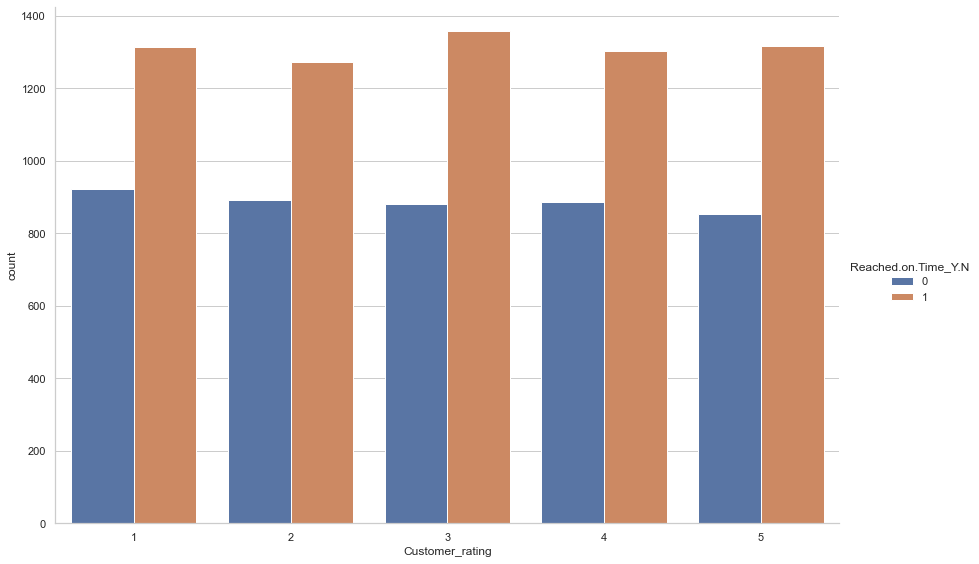

In [27]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Customer_rating',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### 2.5. Fitur Cost_of_the_Product

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Count'>

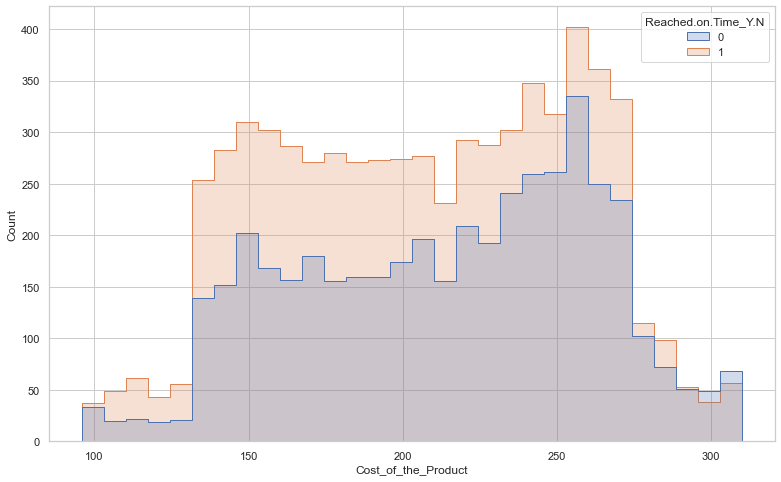

In [28]:
sns.histplot(data=df, x="Cost_of_the_Product",hue="Reached.on.Time_Y.N",element="step")

### 2.6. Fitur Prior_purchases

<Figure size 1440x576 with 0 Axes>

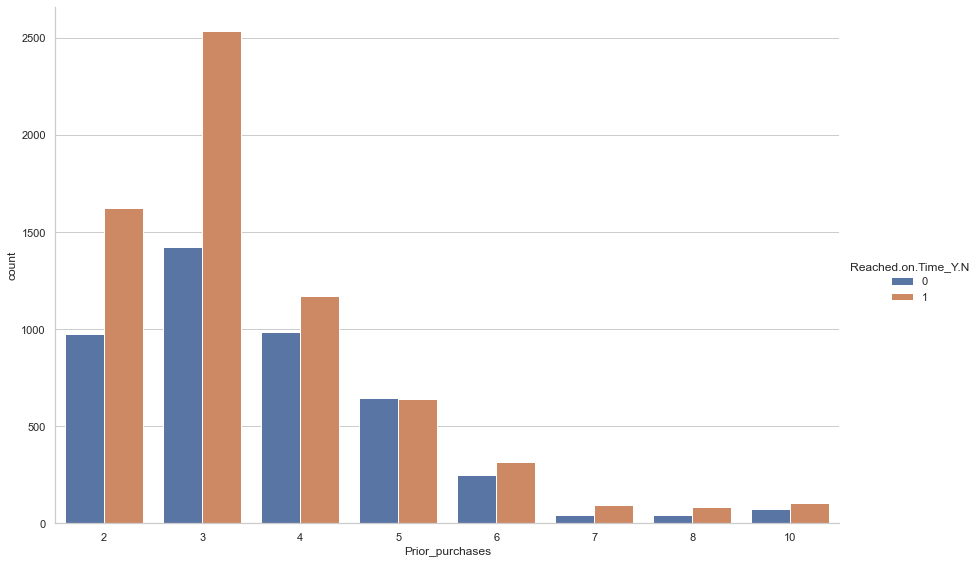

In [29]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Prior_purchases',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### 2.7. Fitur Product_importance

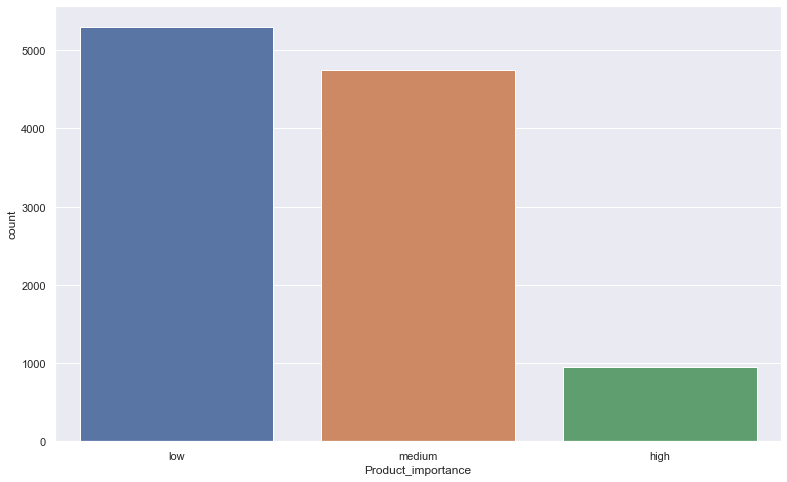

In [30]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='Product_importance',data=df)

<Figure size 1440x576 with 0 Axes>

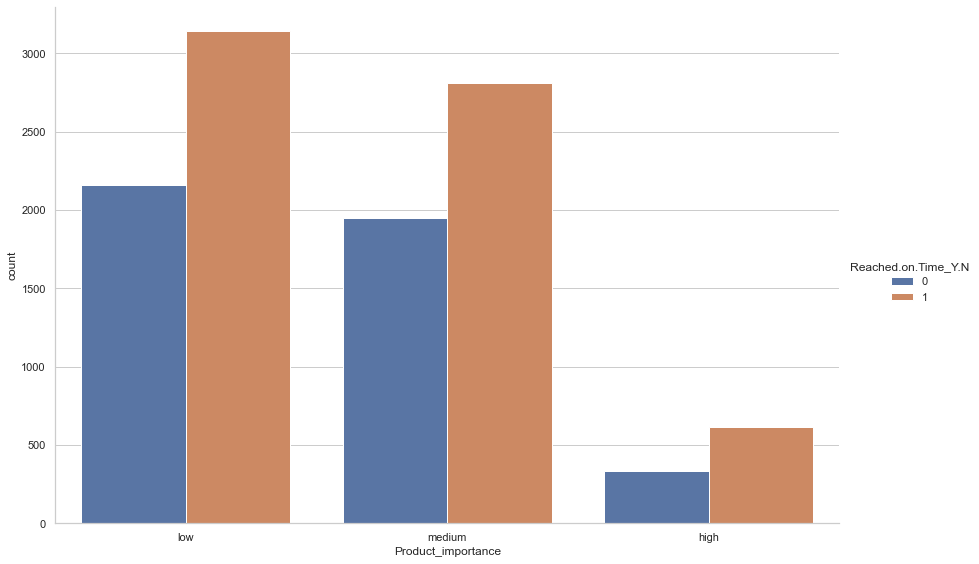

In [31]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Product_importance',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### 2.8. Fitur Gender

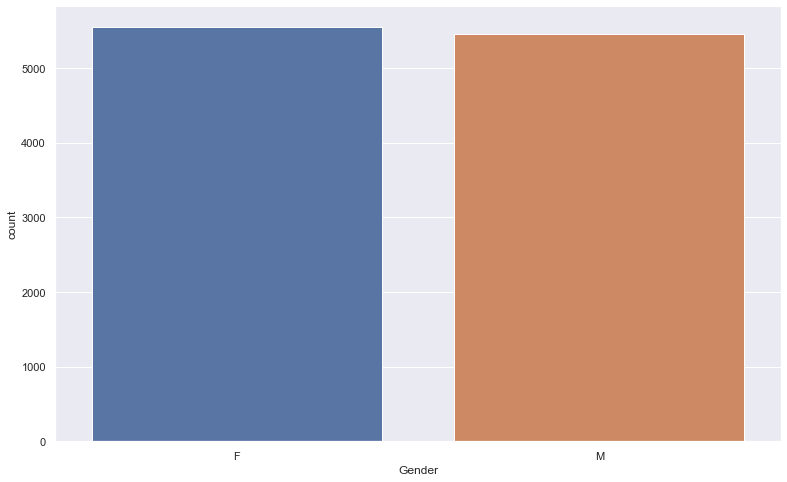

In [32]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='Gender',data=df)

<Figure size 1440x576 with 0 Axes>

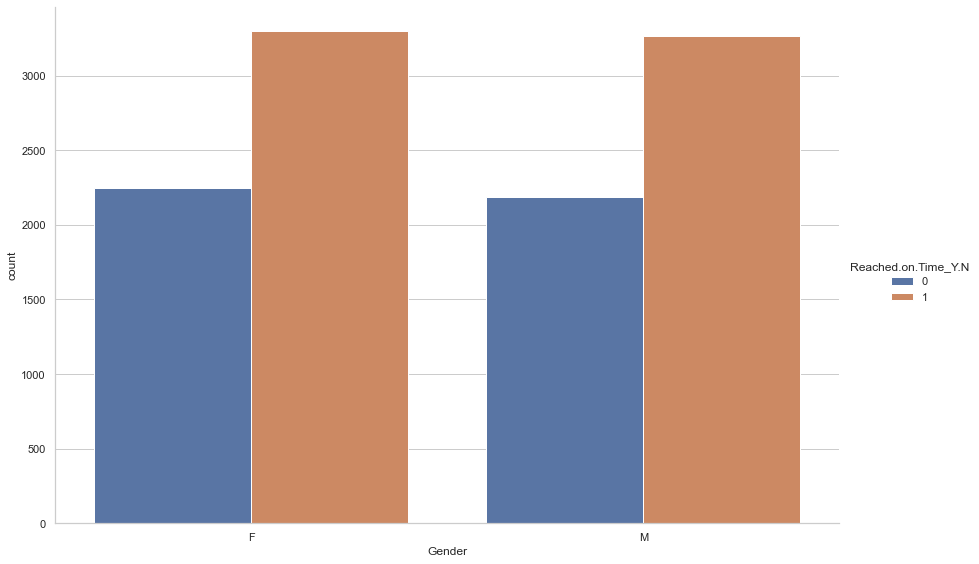

In [33]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Gender',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### 2.9. Fitur Discount_offered

<AxesSubplot:xlabel='Discount_offered', ylabel='Count'>

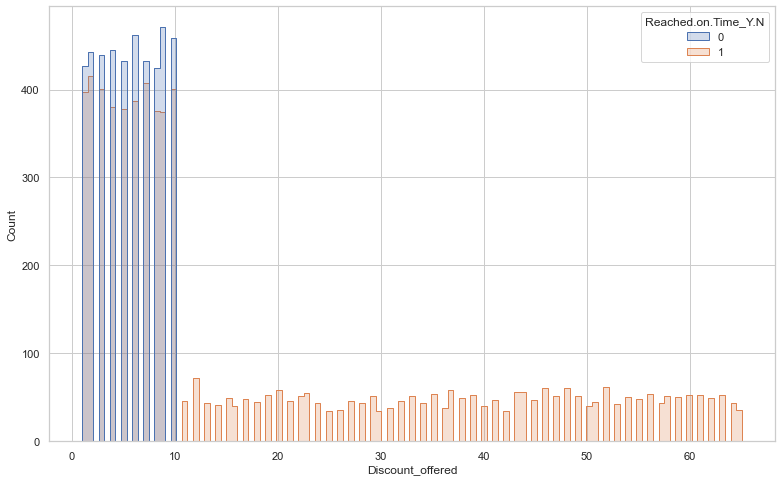

In [34]:
sns.histplot(data=df, x="Discount_offered",hue="Reached.on.Time_Y.N",element="step")

### 2.10. Fitur Weight_in_gms

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Count'>

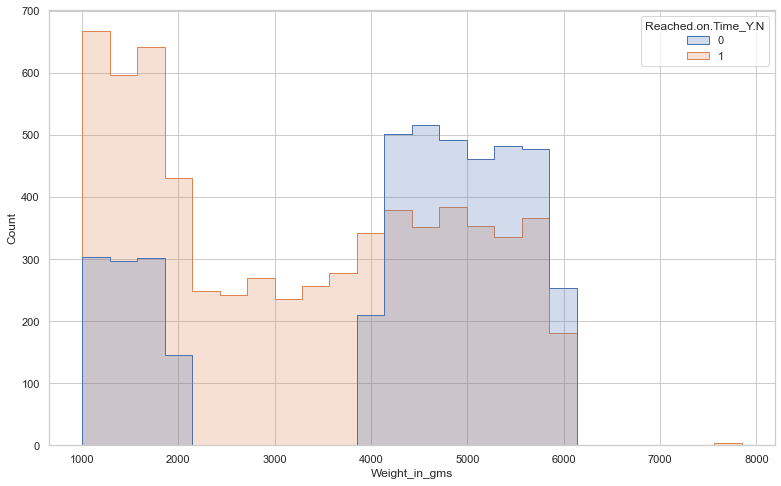

In [35]:
sns.histplot(data=df, x="Weight_in_gms",hue="Reached.on.Time_Y.N",element="step")